# Geolocated wine shops

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from mpl_toolkits.basemap import Basemap as Basemap

In [3]:
# Reading the datasets
df = pd.read_csv("worldcities.csv")
df_wine = pd.read_csv("wines_vinmonopolet.csv")

# Storing every capital of Europe in it's own dataset
df_primary_cities_europe = df[df["CapitalEurope"] == "Yes"].reset_index()


In [9]:
# for matplotlib
plt.style.use("seaborn-bright")
plt.rc("text", usetex=True)
plt.rc("font", family="Georgia", size=14)


In [7]:
mpl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [10]:
# Translation

# Reading the self-made dictionary especially for this assignment
translations = pd.read_csv("translations.csv")

# Dropping any NA's that could be included
translations = translations.dropna()

# Creating a list of all words that need to be translated
translated_words = list(translations.loc[:, "Norwegian"])

# Formatting the strings in translated_words
translated_words.loc[:, "Norwegian"] = translated_words.loc[:, "Norwegian"].str.strip()

# List of all the translation words to do the translation in the loop
translation = list(translations.loc[:, "English"])

# For-loop over all wines from Vinmonopolet
for row in range(df_wine.shape[0]):

    # Doing IF-checks on the columns that need translation
    # Category
    if df_wine.loc[row, "Category"] in translated_words:
        df_wine.loc[row, "Category"] = translation[
            translated_words.index(df_wine.loc[row, "Category"])
        ]

    # Country
    if df_wine.loc[row, "Country"] in translated_words:
        df_wine.loc[row, "Country"] = translation[
            translated_words.index(df_wine.loc[row, "Country"])
        ]

    # Region
    if df_wine.loc[row, "Region"] in translated_words:
        df_wine.loc[row, "Region"] = translation[
            translated_words.index(df_wine.loc[row, "Region"])
        ]


AttributeError: 'list' object has no attribute 'loc'

In [11]:
# Finding the wine-countries
wine_countries = list(set(df_wine.loc[:, "Country"]))

# Creating a list to store all wine countries from Europe
wine_countries_europe = []

# Iterating over all wines, checking whether it is a wine country in Europe
for row in range(len(wine_countries)):

    # Checking whether the country is a wine country
    if wine_countries[row] in list(df_primary_cities_europe.loc[:, "country"]):
        wine_countries_europe.append(wine_countries[row])

# Creating a dataframe based on
df_wine_countries_europe = df_primary_cities_europe[
    df_primary_cities_europe["country"].isin(wine_countries_europe)
].reset_index()

df_wine_countries_europe


level_0  index        city  city_ascii      lat      lng   country iso2  \
0         2   1091      Vienna      Vienna  48.2083  16.3725   Austria   AT   
1         4   1536    Brussels    Brussels  50.8353   4.3314   Belgium   BE   
2         9   9556  Copenhagen  Copenhagen  55.6805  12.5615   Denmark   DK   
3        12  10301       Paris       Paris  48.8566   2.3522    France   FR   
4        13  12348     Tbilisi     Tbilisi  41.7225  44.7925   Georgia   GE   
5        14  12389      Berlin      Berlin  52.5167  13.3833   Germany   DE   
6        16  15523    Budapest    Budapest  47.4983  19.0408   Hungary   HU   
7        18  17968        Rome        Rome  41.8931  12.4828     Italy   IT   
8        20  21775        Riga        Riga  56.9475  24.1069    Latvia   LV   
9        29  24934        Oslo        Oslo  59.9111  10.7528    Norway   NO   
10       31  27257      Lisbon      Lisbon  38.7080  -9.1390  Portugal   PT   
11       37  29905   Ljubljana   Ljubljana  46.0500  14.5167  Slovenia   SI   
12       38  30357      Madrid      Madrid  40.4167  -3.7167     Spain   ES   
13       39  31577   Stockholm   Stockholm  59.3294  18.0686    Sweden   SE   

   iso3               admin_name  capital  population            id  \
0   AUT                     Wien  primary   1911191.0  1.040262e+09   
1   BEL  Brussels-Capital Region  primary   1743000.0  1.056470e+09   
2   DNK              Hovedstaden  primary   1085000.0  1.208764e+09   
3   FRA            Île-de-France  primary  11027000.0  1.250015e+09   
4   GEO                  Tbilisi  primary   1118035.0  1.268203e+09   
5   DEU                   Berlin  primary   3664088.0  1.276451e+09   
6   HUN                 Budapest  primary   1723836.0  1.348611e+09   
7   ITA                    Lazio  primary   2872800.0  1.380383e+09   
8   LVA                     Rīga  primary    614618.0  1.428586e+09   
9   NOR                     Oslo  primary    693494.0  1.578325e+09   
10  PRT                   Lisboa  primary    506654.0  1.620619e+09   
11  SVN                Ljubljana  primary    286745.0  1.705917e+09   
12  ESP                   Madrid  primary   6006000.0  1.724617e+09   
13  SWE                Stockholm  primary    975819.0  1.752426e+09   

   CapitalEurope  
0            Yes  
1            Yes  
2            Yes  
3            Yes  
4            Yes  
5            Yes  
6            Yes  
7            Yes  
8            Yes  
9            Yes  
10           Yes  
11           Yes  
12           Yes  
13           Yes

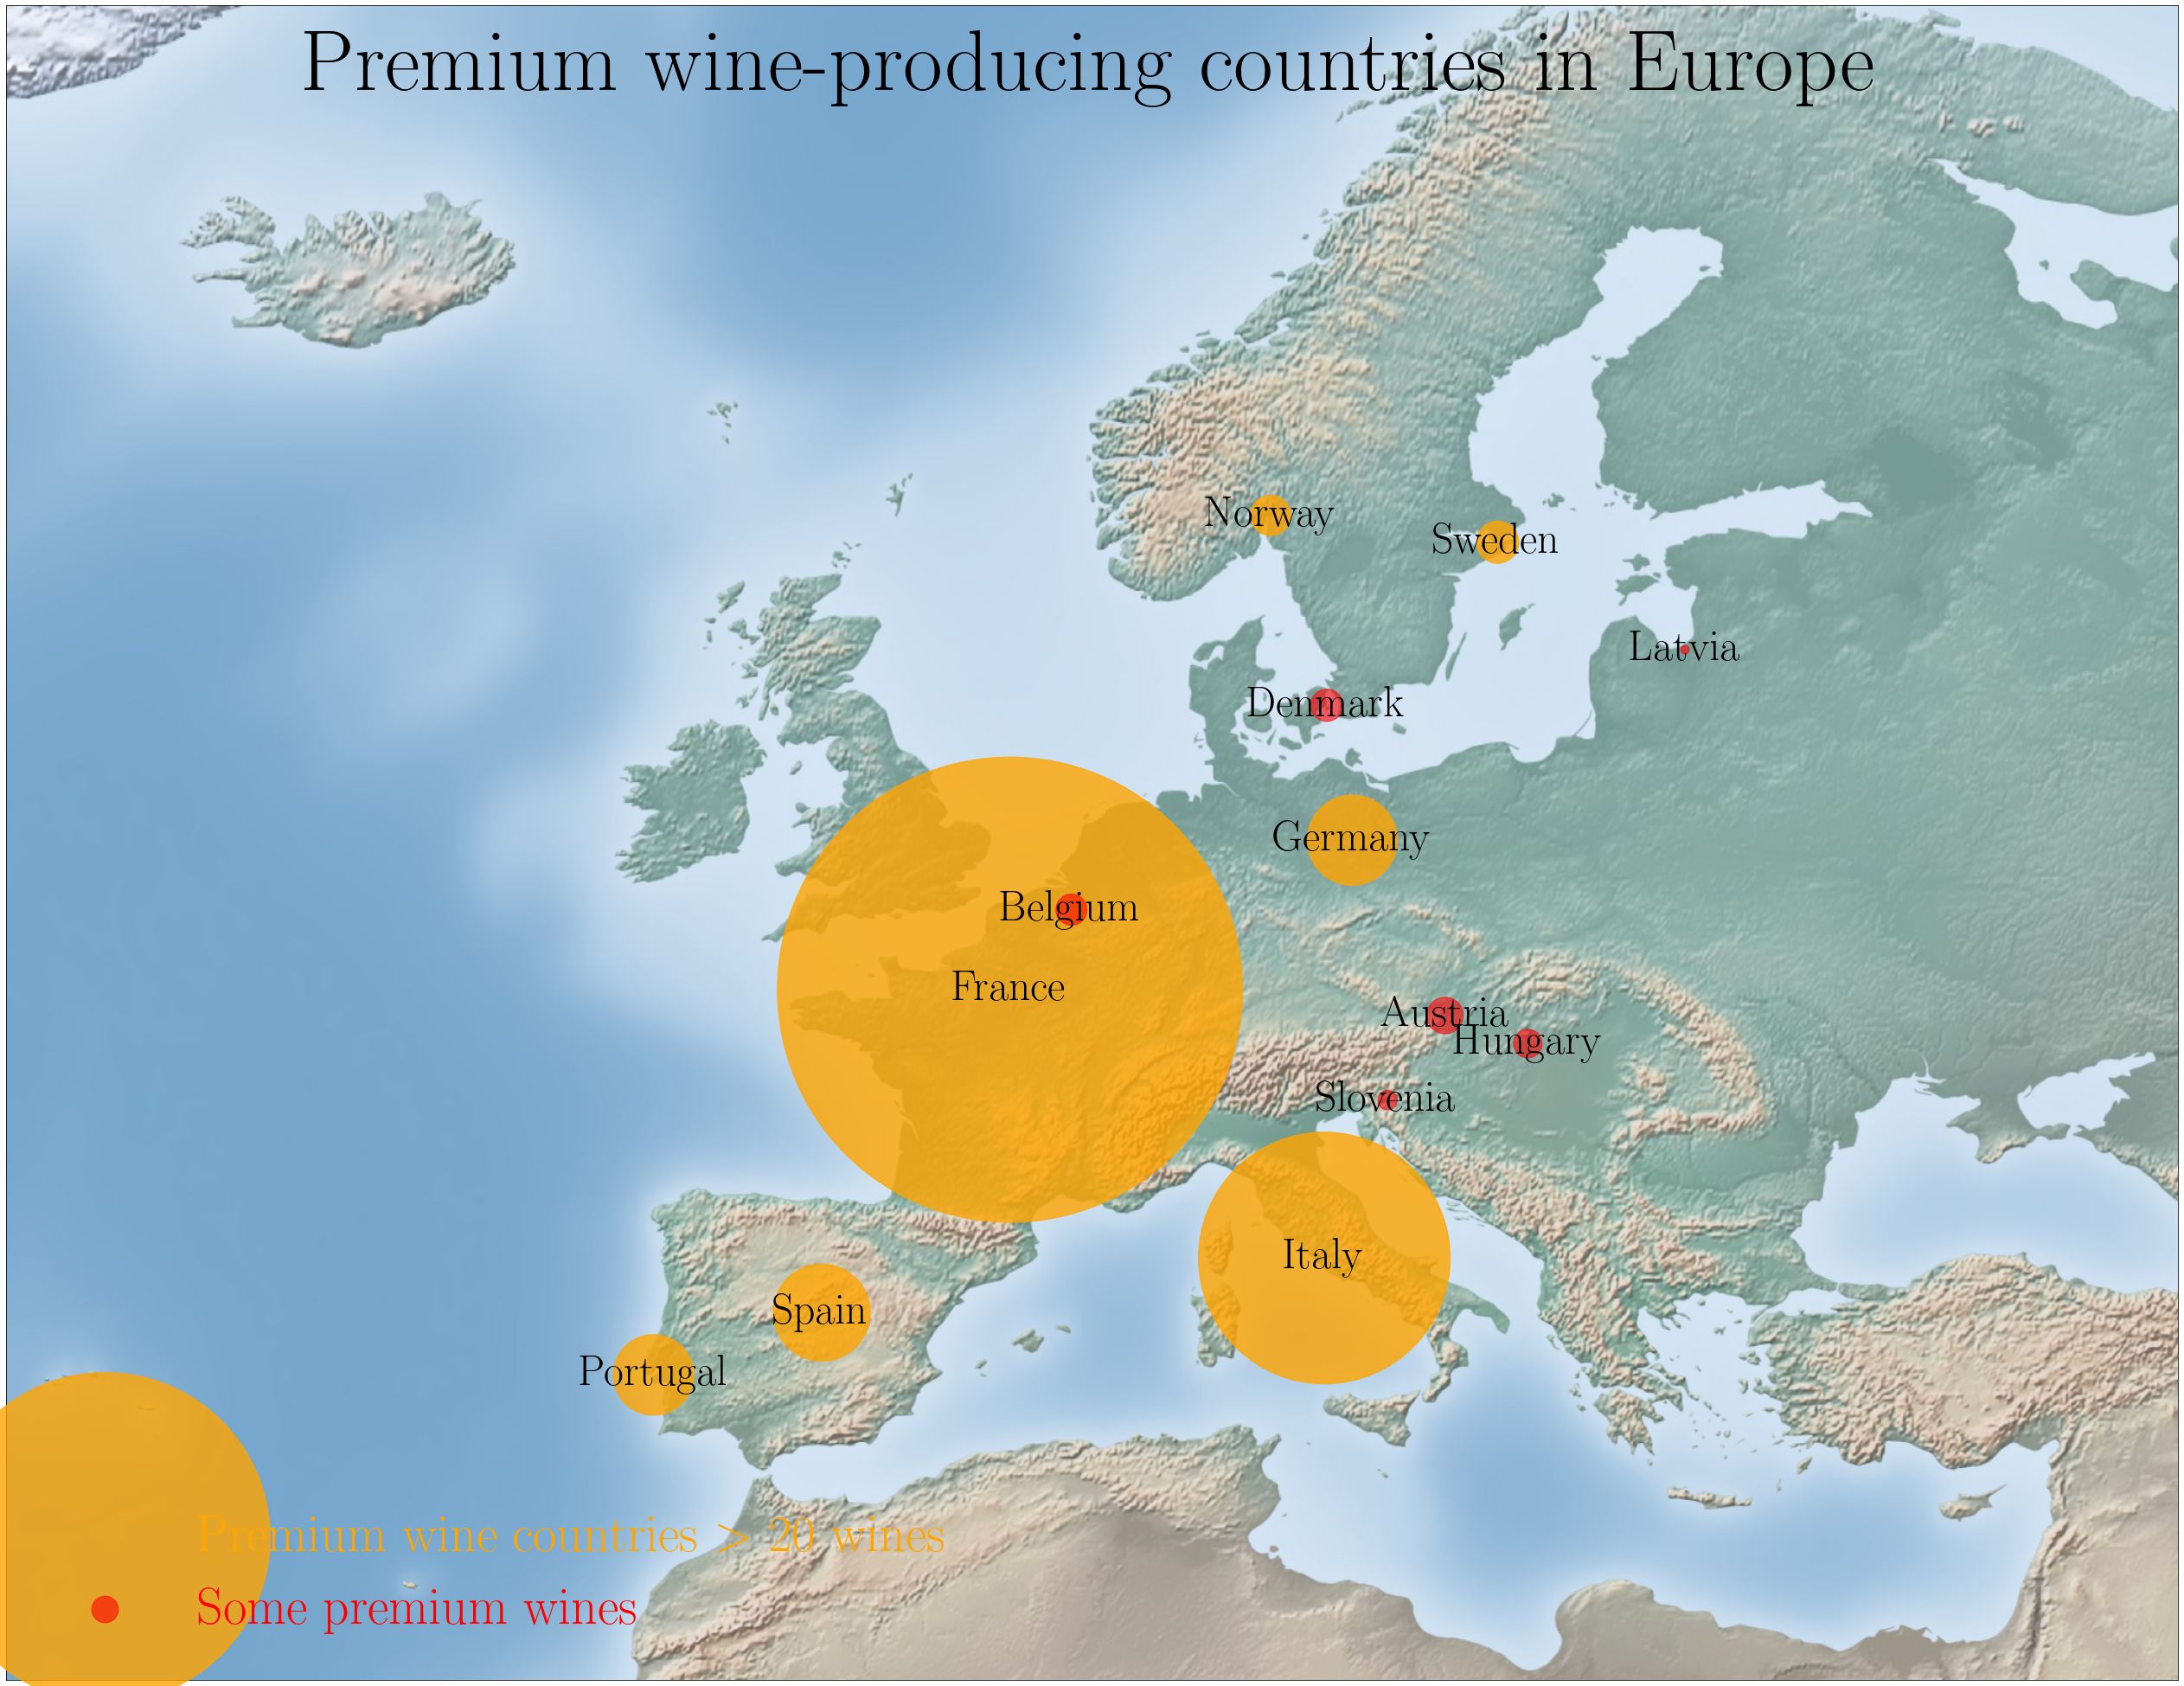

In [34]:
# Creating the directed graph
G = nx.Graph()

# Creating the nodes, adding them to the graph
nodes = list(df_wine_countries_europe.loc[:, "country"])
G.add_nodes_from(nodes)

# Creating the figure
FIG = plt.figure(figsize=(45, 45))

# Drawing the map
m = Basemap(
    projection="mill",
    llcrnrlon=-30,
    llcrnrlat=30,
    urcrnrlon=40,
    urcrnrlat=70,
    resolution="i",
)

# Adjusting the Basemap
# m.drawcountries(linewidth=3)
# m.drawcoastlines(linewidth=5)
m.shadedrelief()

# Creating a positional of lat and long values
origin, dest = m(
    df_wine_countries_europe["lng"].values, df_wine_countries_europe["lat"].values
)
pos = {}
for count, elem in enumerate(df_wine_countries_europe["country"]):
    pos[elem] = (origin[count], dest[count])

# Creating dictionary with weights to how many wines coming from the country
wine_country_count = (
    df_wine[df_wine["Country"].isin(wine_countries_europe)]
    .groupby("Country")["Name"]
    .count()
)

d = {key: count for key, count in zip(wine_country_count.index, wine_country_count)}

# Drawing the nodes in the network (different colors for different nodes)
# The biggest airports
nx.draw_networkx_nodes(
    G,
    pos=pos,
    alpha=0.8,
    nodelist=[v for v in G.nodes if d[v] >= 20],
    node_size=[d[v]*100 for v in G.nodes if d[v] >= 20],
    node_color="orange",
)

# Smaller airports
nx.draw_networkx_nodes(
    G,
    pos=pos,
    alpha=0.6,
    nodelist=[v for v in G.nodes if d[v] <= 20],
    node_size=[d[v]*100 for v in G.nodes if d[v] <= 20],
    node_color="red",
)

# Drawing the labels in the network
nx.draw_networkx_labels(
    G,
    pos=pos,
    labels={node: node for node in G.nodes()},
    font_color="black",
    font_size=50,
)


# #Adding legend
plt.legend(
    ["Premium wine countries $>$ 20 wines", "Some premium wines"],
    loc=3,
    framealpha=0,
    prop={"size": 60},
    labelcolor=["orange", "red"],
    facecolor="#052a61",
)

# Adding a title to the network
plt.title(
    "Premium wine-producing countries in Europe\n",
    fontsize=100,
    color="black",
    pad=-200,
    fontfamily="monospace",
)

# Displaying the visualization
plt.show()


/tmp/ipykernel_5983/2399522158.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regions.loc[:, "Region"] = regions.loc[:, "Region"].str.strip()


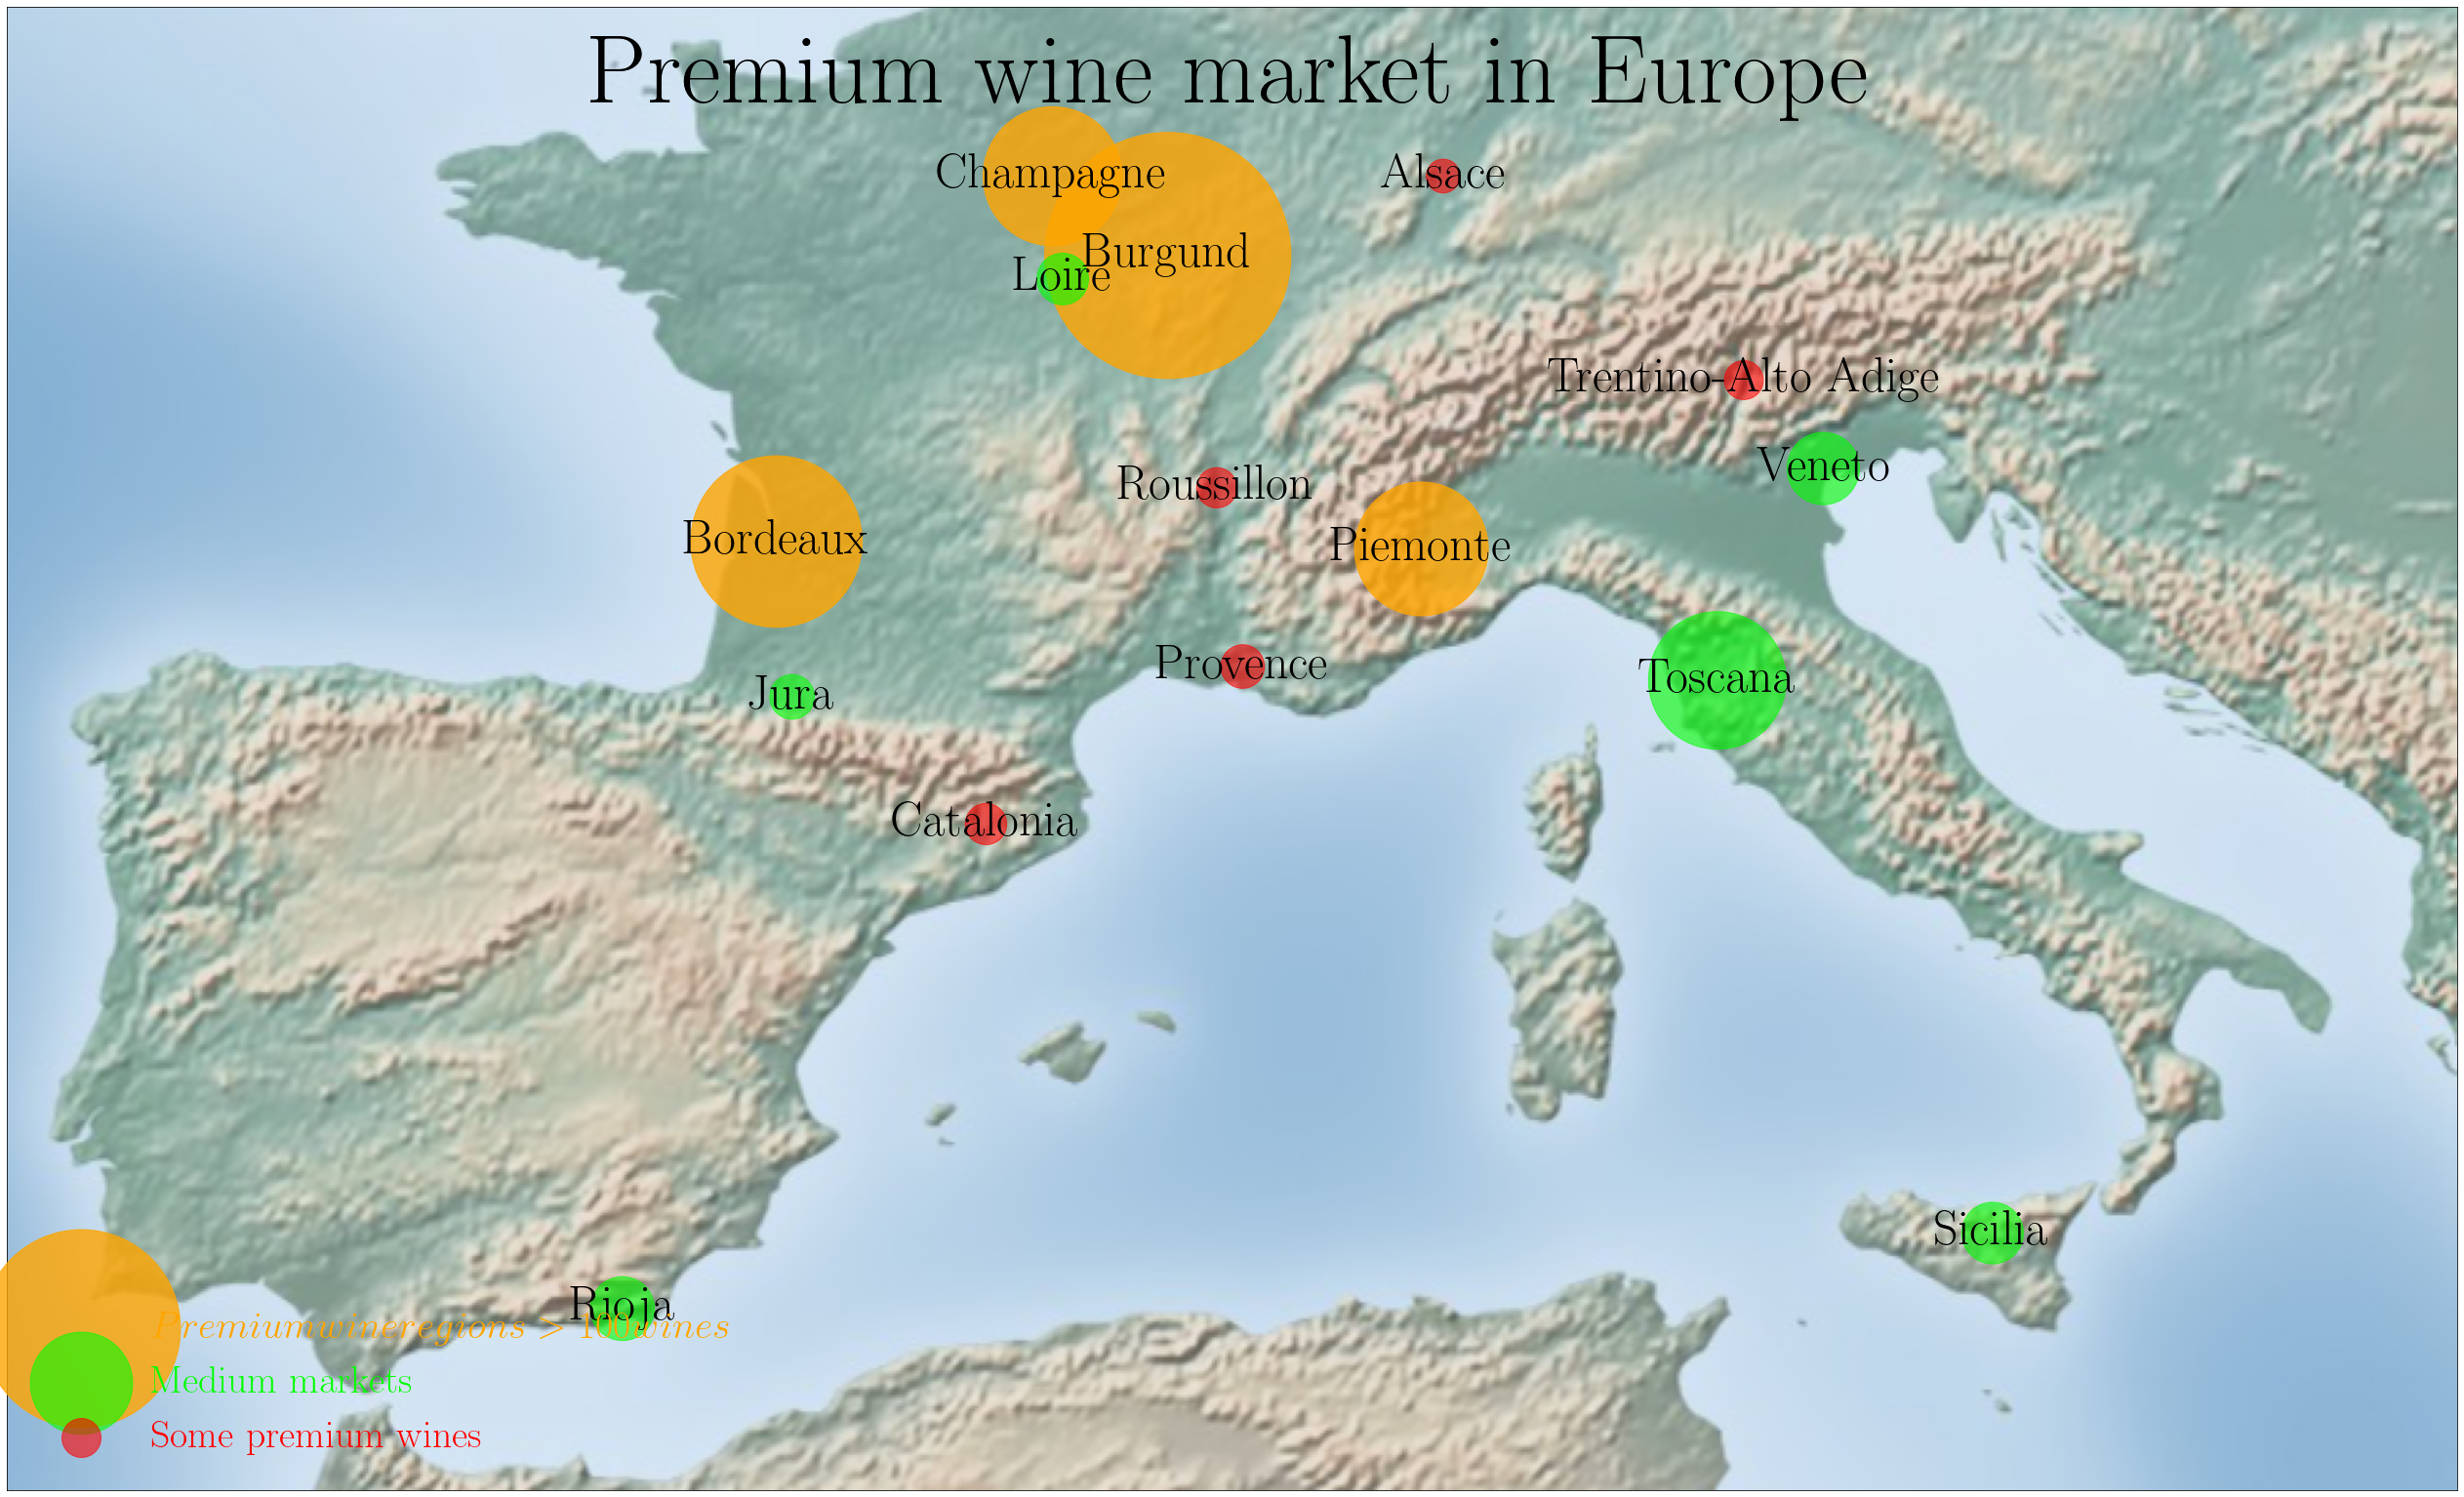

In [37]:
# REGIONS WITH PREMIUM WINES#

# Plotting the regions for geolocated data
regions = df_wine[
    (df_wine["Country"].isin(["France", "Spain", "Italy"]))
    & (df_wine["Region"] != "not found")
    & (df_wine["Region"] != " Øvrige")
    & (df_wine["Category"] != "Liquor")
]
regions.loc[:, "Region"] = regions.loc[:, "Region"].str.strip()
test_regions = regions.groupby("Region")["Country"].count()
regions = test_regions[test_regions > 5]
unique_regions = set(regions.index)
regions = zip(regions.index, regions)


# Creating positional dictionary
premium_wine_cities = {"name": [], "lat": [], "lon": []}

# Getting lat and long for geolocated data
for city in unique_regions:
    name = city
    city = city.lower().strip()

    # Checking first if the region is in either 'city'- or 'city_ascii' column
    if (city.lower() in [city.lower().strip() for city in df.loc[:, "city"]]) or (
        city in [city.lower().strip() for city in df.loc[:, "city_ascii"]]
    ):

        # If we get a match, we iterate over to get the lat and long values
        for i in range(df.shape[0]):
            # Need to check both columns since we got both cities and regions.
            # Cities/Regions 1
            if name.lower().strip() == df.loc[i, "city"].lower().strip():
                name = name.strip()
                premium_wine_cities["name"].append(name)
                premium_wine_cities["lat"].append(df.loc[i, "lat"])
                premium_wine_cities["lon"].append(df.loc[i, "lng"])
                break

            # Cities/Regions 2
            if name.lower().strip() == df.loc[i, "city_ascii"].lower().strip():
                name = name.strip()
                premium_wine_cities["name"].append(name)
                premium_wine_cities["lat"].append(df.loc[i, "lat"])
                premium_wine_cities["lon"].append(df.loc[i, "lng"])
                break

# Storing the lat and long in a dataset
regions_df = pd.DataFrame(premium_wine_cities)


# MAP FOR PREMIUM WINES ONLY IN FRANCE, SPAIN AND ITALY#

# Creating the undirected graph
G = nx.Graph()

# Creating the nodes, adding them to the graph
nodes = [city for city in regions_df.loc[:, "name"]]
G.add_nodes_from(nodes)

# Creating the figure
FIG = plt.figure(figsize=(45, 45))

# Drawing the map
m = Basemap(
    projection="mill",
    llcrnrlon=-10,
    llcrnrlat=35,
    urcrnrlon=20,
    urcrnrlat=50,
    resolution="i",
)

# Adjusting the Basemap
# m.drawcountries(linewidth=3)
# m.drawcoastlines(linewidth=5)
# m.bluemarble()
m.shadedrelief()

# Creating a positional of lat and long values
origin, dest = m(regions_df["lon"].values, regions_df["lat"].values)
pos = {}
for count, elem in enumerate(regions_df["name"]):
    pos[elem] = (origin[count], dest[count])

# Creating dictionary with weights to how many wines coming from the region
d = {key: count for key, count in regions}

# Drawing the nodes in the network (different colors for different nodes)
# Drawing names of cities with >100 premium wines
nx.draw_networkx_nodes(
    G,
    pos=pos,
    alpha=0.8,
    nodelist=[v for v in G.nodes if d[v] > 200],
    node_size=[d[v] * 50 for v in G.nodes if d[v] > 200],
    node_color="orange",
)

# Drawing names of cities with 21 to 100 premium wines
nx.draw_networkx_nodes(
    G,
    pos=pos,
    alpha=0.6,
    nodelist=[v for v in G.nodes if (d[v] > 20) and (d[v] <= 200)],
    node_size=[d[v] * 100 for v in G.nodes if (d[v] > 20) and (d[v] <= 200)],
    node_color="lime",
)

# Drawing names of cities with <20 premium wines
nx.draw_networkx_nodes(
    G,
    pos=pos,
    alpha=0.6,
    nodelist=[v for v in G.nodes if d[v] <= 20],
    node_size=[d[v] * 100 for v in G.nodes if d[v] <= 20],
    node_color="red",
)

# Drawing names of cities
nx.draw_networkx_labels(
    G,
    pos=pos,
    labels={node: node for node in G.nodes()},
    font_color="black",
    font_size=50,
)


# Adding legend
plt.legend(
    ["$Premium wine regions > 100 wines$", "Medium markets", "Some premium wines"],
    loc=3,
    framealpha=0,
    prop={"size": 40},
    labelcolor=["orange", "lime", "red"],
    facecolor="#052a61",
)

# Adding a title
plt.title(
    "Premium wine market in Europe\n",
    fontsize=100,
    color="black",
    pad=-200,
    fontfamily="monospace",
)

# Displaying the visualization
plt.show()
